<h1><center> Students Performance Project</center> </h1>



### Task 1: Student performance prediction
### Task 2: Gender Prediction


#### Import libraries

In [22]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [23]:
data = pd.read_csv("C:\\Users\\Айдана\\.ipynb_checkpoints\\StudentsPerformance.csv")
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<h2> First Part. About data  </h2>

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


We have 1000 observations, 5 caterogical columns , and 3 scores by exam

#### Some basic statistic information

In [25]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


We can see that maximum score in three subjects is 100 . And the lowest score is 0. The average score varies from 66 to 69. 

#### Adding New features

In [26]:
data['Total'] = data['math score']+data['reading score']+data['writing score']

#### Are there consist  a null strings?

In [27]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
Total                          0
dtype: int64

#### How many women and men?

female    518
male      482
Name: gender, dtype: int64

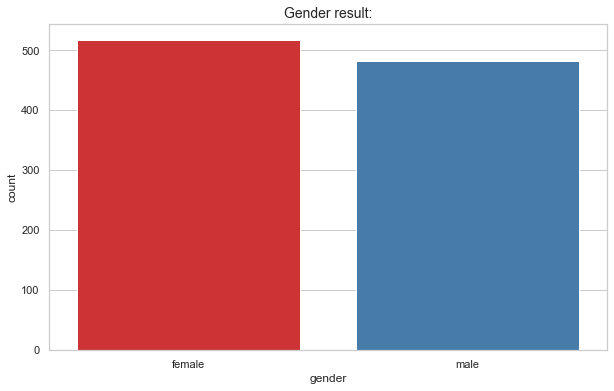

In [28]:
plt.figure(figsize=(10,6))
plt.title('Gender result:',fontsize=14)
sns.countplot(x="gender",data=data,palette="Set1")
data['gender'].value_counts()

Among students there are 36 more women than men

#### How many people completed the test preparation course?

none         642
completed    358
Name: test preparation course, dtype: int64

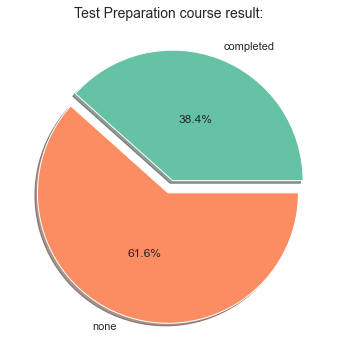

In [29]:
sns.set(style='whitegrid',palette='Set2')
test_preparation= data.groupby("test preparation course")['Total'].sum()
pie, ax = plt.subplots(figsize=[10,6])
labels = test_preparation.keys()
plt.pie(x=test_preparation,autopct="%.1f%%",explode=[0.05]*2, labels=labels, pctdistance=0.5,shadow=True)
plt.title("Test Preparation course result: ", fontsize=14)
data['test preparation course'].value_counts()

Among students, 61.6 % did not complete the test preparation course

#### What kind of ethnicity we have?

In [30]:
ethnicity_groups = data['race/ethnicity'].value_counts()
ethnicity_groups.sort_values()

group A     89
group E    140
group B    190
group D    262
group C    319
Name: race/ethnicity, dtype: int64

There are only 5 groups, of which group A has the smallest number of students. The largest number of students in group C. 

<h2> Second Part. Compare  </h2>

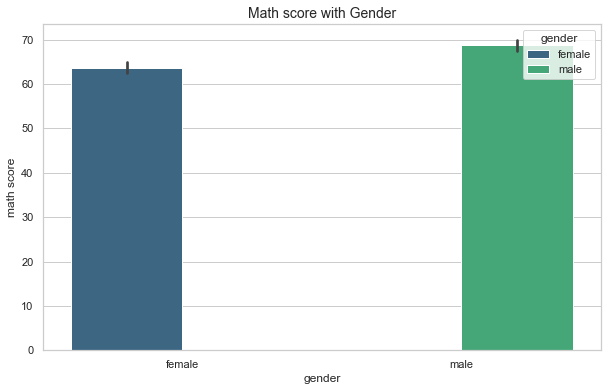

In [31]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
plt.title("Math score with Gender",fontsize=14)
ax = sns.barplot(x="gender", y="math score", hue="gender", data=data,palette="viridis",saturation=0.75)

By the math score men have greater grade than womans

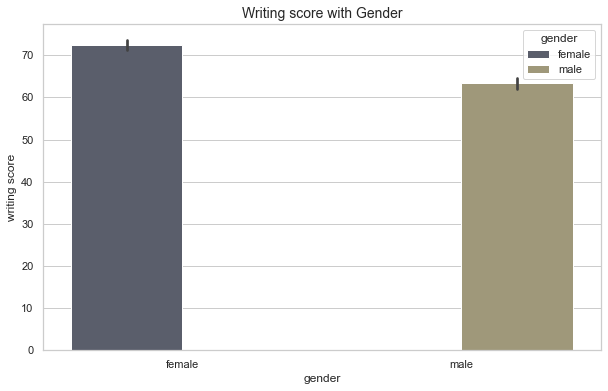

In [32]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
plt.title("Writing score with Gender",fontsize=14)
ax = sns.barplot(x="gender", y="writing score", hue="gender", data=data,palette="cividis",saturation=0.75)

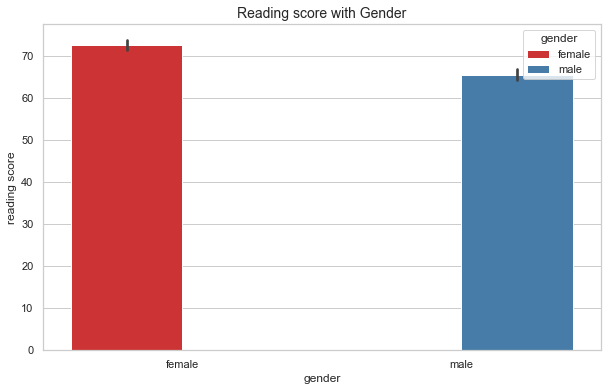

In [33]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
plt.title("Reading score with Gender",fontsize=14)
ax = sns.barplot(x="gender", y="reading score", hue="gender", data=data,palette="Set1",saturation=0.75)

And we see that in humanitarian subjects like reading and writing, women scores higher than men.

standard        645
free/reduced    355
Name: lunch, dtype: int64

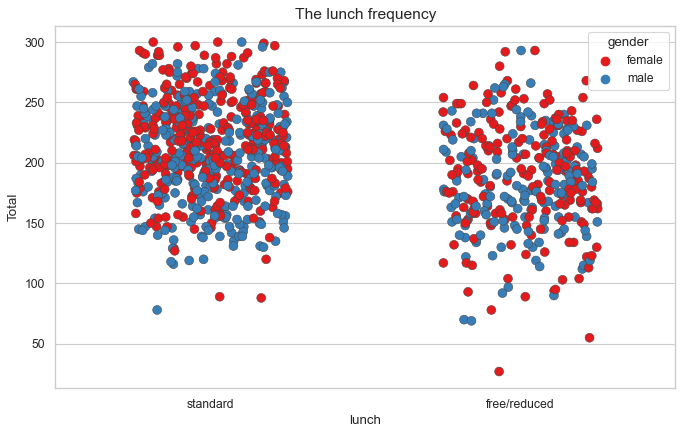

In [34]:
fig, ax = plt.subplots(figsize=(10,6), dpi= 80)    
sns.stripplot(x='lunch', y='Total', data= data,hue='gender',jitter=0.25, size=8, ax=ax, linewidth=.5,palette='Set1')
plt.title('The lunch frequency', fontsize=14)
data['lunch'].value_counts()

Both men and women prefer a standard lunch.

none         642
completed    358
Name: test preparation course, dtype: int64

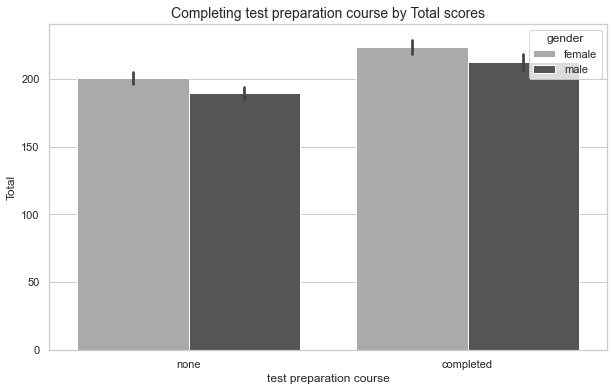

In [35]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
plt.title("Completing test preparation course by Total scores",fontsize=14)
ax = sns.barplot(x="test preparation course", y="Total", hue="gender", data=data,palette="binary",saturation=0.75)
data['test preparation course'].value_counts()

In [36]:
data['Total'].max()

300

Number of those who completed the preparatory course of 1000 students: 358. None completed:  642

The maximum score in three subjects is 300. Those who completed the preparatory course scored above 200

Among those who passed the preparatory course and scored above 200, women dominate.

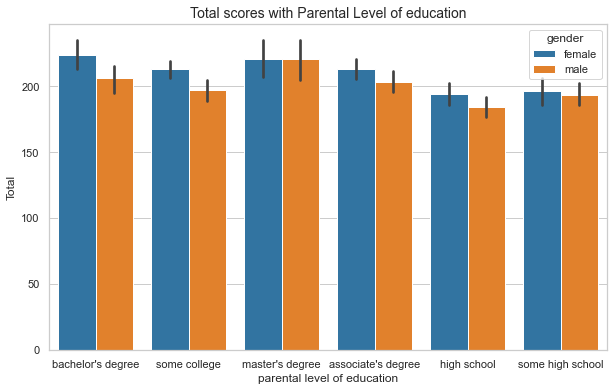

In [37]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
plt.title("Total scores with Parental Level of education",fontsize=14)
ax = sns.barplot(x="parental level of education", y="Total", hue="gender", data=data,palette="tab10",saturation=0.75)

The highest scores on the sum of three subjects were obtained by male students with a bachelor's degree in parenting, and male and female students with a master's degree in parenting.

After them, students who have a degree of education from some college parents and a associate's degree.

<h2> Third Part. Linear Regression  </h2>

#### Task1. Student performance predict(math score)

#### import libraries 

In [39]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

1. target: Math score

2. predictors: Gender,Ethnicity,Parental level of Education,Preparation course completion,lunch

#####  preparing the data

In [40]:
X = data[['gender','race/ethnicity','parental level of education','test preparation course','lunch']]   # independent vars


#####  get_dummies  converts categorical data into boolean such as 0 or 1 . For example in our data after we have used the function  now in the column "female" : if the student is woman it would be represents like 1 ,and if man 0. And in the column "male": if the student is man it would be represent like 1 and if woman 0. And so on 

In [41]:
X = pd.get_dummies(data=X, drop_first=True)


In [42]:
Y = data['math score']  #dependent var

##### train data,it means that we divided data into two groups 80% for training model,and the 20% for testing

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 12)
(200, 12)
(800,)
(200,)


In [45]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [46]:
print(model.intercept_)   #b0
print(model.coef_)        #b1

59.091915925577624
[ 4.52071436  0.18236164  0.60287307  3.6121319   9.07793455  3.11905066
 -4.09050311  1.07460497 -0.14500768 -2.8963916  -5.87451315 11.52399662]


### Сoefficients

In [47]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])

In [48]:
coeff_df

,Coefficient
gender_male,4.520714
race/ethnicity_group B,0.182362
race/ethnicity_group C,0.602873
race/ethnicity_group D,3.612132
race/ethnicity_group E,9.077935
parental level of education_bachelor's degree,3.119051
parental level of education_high school,-4.090503
parental level of education_master's degree,1.074605
parental level of education_some college,-0.145008
parental level of education_some high school,-2.896392


### Prediction

In [49]:
y_pred = model.predict(X_test)


In [50]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
521,91,65.344272
737,53,59.129270
740,80,75.993296
660,74,58.195983
411,84,84.069554
678,81,61.350249
626,69,63.794992
513,54,67.901883
859,87,58.340990
136,51,72.422597


### Evaluate model

In [51]:
from sklearn import metrics

In [52]:
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 11.269872775277623
MSE: 200.51084564367298
RMSE: 14.160185226319356


In [53]:
print("Train Accuracy:",model.score(X_train, y_train))
print("Test Accuracy:",model.score(X_test, y_test))

Train Accuracy: 0.26660391608072975
Test Accuracy: 0.17599998338251188


At the result, we can see that our model is not so good predicted real  math scores. Train model result is 26% and the Test model result is 17%

### Task 2. Gender prediction

1. target: gender

2. predictors : Math score,Writing score,Reading score

#####  preparing the data

In [54]:
X = data[['math score','writing score','reading score']]   # independent vars


In [55]:
Y = data['gender']
Y = pd.get_dummies(data=Y, drop_first=False)
Y.head()

,female,male
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


##### train data


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 3)
(200, 3)
(800, 2)
(200, 2)


In [58]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [59]:
print(model.intercept_)   #b0
print(model.coef_)        #b1

[0.23363321 0.76636679]
[[-0.03838198  0.0362845   0.00518976]
 [ 0.03838198 -0.0362845  -0.00518976]]


### Prediction

In [60]:
y_pred = model.predict(X_test)

### Evaluate model

In [61]:
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.2600508746973638
MSE: 0.10171249615215992
RMSE: 0.3189239660987552


In [62]:
print("Train Accuracy:",model.score(X_train, y_train))
print("Test Accuracy:",model.score(X_test, y_test))

Train Accuracy: 0.5577693587302461
Test Accuracy: 0.5927835205598644


Summarizing the results of the test model for gender prediction showed 59%.